In [3]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import xarray as xr

%matplotlib inline
plt.rcParams.update({'font.size': 12})



In [4]:
filename = '/Users/gabriel/Desktop/DATA-LASP/frd_dmin.nc'
dataset = nc.Dataset(filename)



In [5]:
ds = xr.open_dataset(filename)
df = ds.to_dataframe()
df.reset_index(inplace=True)



In [6]:
df['Time_Diff'] = df['Time'].diff()
df['Time_Diff'].max()

Timedelta('0 days 00:01:00')

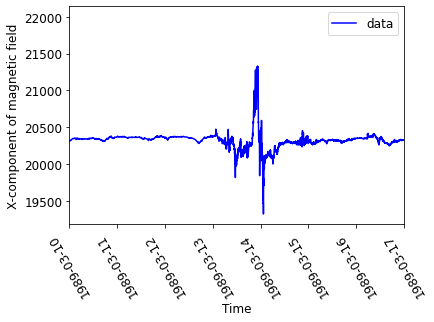

In [7]:

plt.plot(df['Time'], df['X'], label='data', color='blue')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')


plt.xlim([datetime.date(1989, 3, 10), datetime.date(1989, 3, 17)])
plt.xticks(rotation=120)
plt.legend()



In [18]:
rmean = df['X'].rolling(95).mean()
rstd = df['X'].rolling(95).std()

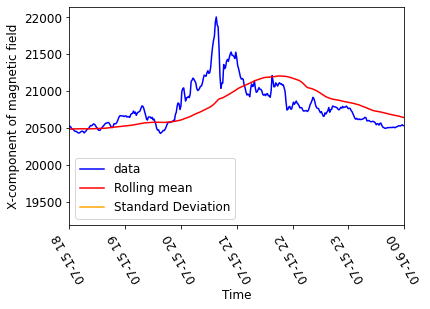

In [17]:
plt.plot(df['Time'], df['X'], label='data', color='blue')
plt.plot(df['Time'], rmean, color='red', label='Rolling mean')
plt.plot(df['Time'], rstd, color='orange', label='Standard Deviation')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')

plt.xlim([datetime.datetime(2000, 7, 15, 18), datetime.datetime(2000, 7, 16, 00)])
plt.xticks(rotation=120)
plt.legend()


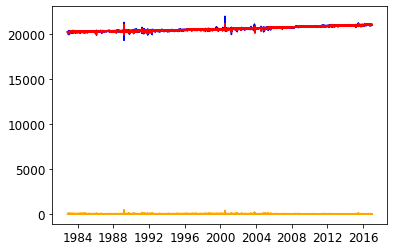

In [19]:
plt.plot(df['Time'], df['X'], label='data', color='blue')
plt.plot(df['Time'], rmean, color='red', label='Rolling mean')
plt.plot(df['Time'], rstd, color='orange', label='Standard Deviation')
plt.show()